In [189]:
## CitiBike Data Analysis
#### Original Producer: Luis Vale DaSilva (PharmD)

In [31]:
import glob
# Get file names
filenames = glob.glob('*.csv')

import pandas as pd
# Loop through file names and read the data
dfs = []
for file in filenames:
    print('Reading ' + file)
    dfs.append(pd.read_csv(file))

Reading 2014-04 - Citi Bike trip data.csv


In [32]:
!rm *.csv

In [33]:
# check only data (April 2017)
dfs[0].head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,558,2014-04-01 00:00:07,2014-04-01 00:09:25,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,-74.016777,21062,Subscriber,1982,1
1,882,2014-04-01 00:00:20,2014-04-01 00:15:02,349,Rivington St & Ridge St,40.718502,-73.983299,312,Allen St & E Houston St,40.722055,-73.989111,20229,Subscriber,1988,1
2,587,2014-04-01 00:00:25,2014-04-01 00:10:12,293,Lafayette St & E 8 St,40.730287,-73.990765,334,W 20 St & 7 Ave,40.742388,-73.997262,20922,Subscriber,1959,1
3,355,2014-04-01 00:00:44,2014-04-01 00:06:39,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,282,Kent Ave & S 11 St,40.708273,-73.968341,20914,Subscriber,1981,1
4,524,2014-04-01 00:01:29,2014-04-01 00:10:13,459,W 20 St & 11 Ave,40.746745,-74.007756,503,E 20 St & Park Ave,40.738274,-73.987520,21051,Subscriber,1964,1
5,301,2014-04-01 00:01:53,2014-04-01 00:06:54,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,500,Broadway & W 51 St,40.762288,-73.983362,17286,Subscriber,1970,1
6,136,2014-04-01 00:02:34,2014-04-01 00:04:50,386,Centre St & Worth St,40.714948,-74.002345,387,Centre St & Chambers St,40.712733,-74.004607,21429,Subscriber,1983,2
7,151,2014-04-01 00:02:40,2014-04-01 00:05:11,223,W 13 St & 7 Ave,40.737815,-73.999947,405,Washington St & Gansevoort St,40.739323,-74.008119,15572,Subscriber,1992,1
8,434,2014-04-01 00:02:58,2014-04-01 00:10:12,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,17582,Subscriber,1992,2
9,164,2014-04-01 00:02:59,2014-04-01 00:05:43,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,460,S 4 St & Wythe Ave,40.712859,-73.965903,16010,Subscriber,1983,1


In [34]:
dfs[0].dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [37]:
print('Converting month:')
for month in range(1):
    if month < 8:
        print('... ' + str(month + 1))
        dfs[month]['starttime'] = pd.to_datetime(dfs[month]['starttime'])
        dfs[month]['stoptime'] = pd.to_datetime(dfs[month]['stoptime'])
    else:
        print('... ' + str(month + 1))
        dfs[month]['starttime'] = pd.to_datetime(dfs[month]['starttime'],
                                                 format = '%m/%d/%Y %H:%M:%S')
        dfs[month]['stoptime'] = pd.to_datetime(dfs[month]['stoptime'],
                                                format = '%m/%d/%Y %H:%M:%S')

Converting month:
... 1


In [38]:
dfs[0].dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

In [40]:
dfs[0].tail(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
670778,588,2014-04-30 23:56:43,2014-05-01 00:06:31,533,Broadway & W 39 St,40.752996,-73.987216,495,W 47 St & 10 Ave,40.762699,-73.993012,14567,Subscriber,1980,1
670779,657,2014-04-30 23:57:28,2014-05-01 00:08:25,501,FDR Drive & E 35 St,40.744219,-73.971212,501,FDR Drive & E 35 St,40.744219,-73.971212,20700,Subscriber,1990,1


In [41]:
df = pd.concat(dfs)

In [42]:
df.shape

(670780, 15)

In [44]:
df.to_pickle('..citibike_2013.pk1')

In [45]:
import pandas as pd
import matplotlib as mp1
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [46]:
file_name = '..citibike_2013.pk1'
%time df = pd.read_pickle(file_name)

CPU times: user 1.14 s, sys: 153 ms, total: 1.3 s
Wall time: 1.74 s


In [47]:
# Observations and variables
df.shape

(670780, 15)

In [48]:
# Variable name and data types
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

In [49]:
# Top of dataset
df.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,558,2014-04-01 00:00:07,2014-04-01 00:09:25,82,St James Pl & Pearl St,40.711174,-74.000165,2008,Little West St & 1 Pl,40.705693,-74.016777,21062,Subscriber,1982,1
1,882,2014-04-01 00:00:20,2014-04-01 00:15:02,349,Rivington St & Ridge St,40.718502,-73.983299,312,Allen St & E Houston St,40.722055,-73.989111,20229,Subscriber,1988,1


In [50]:
# Summary
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,670780.000000,670780.000000,670780.000000,670780.000000,670780.000000,670780.000000,670780.000000,670780.000000,670780.000000
mean,831.708272,450.619890,40.734874,-73.990789,450.050802,40.734640,-73.990987,18133.301440,1.106087
std,897.188107,361.452195,0.019466,0.012159,364.806463,0.019437,0.012236,2104.731495,0.531985
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,386.000000,307.000000,40.721816,-73.999496,305.000000,40.721655,-73.999947,16301.000000,1.000000
50%,611.000000,407.000000,40.736502,-73.990741,405.000000,40.736494,-73.990765,18114.000000,1.000000
75%,1012.000000,490.000000,40.750200,-73.981948,488.000000,40.750020,-73.981948,19949.000000,1.000000
max,21553.000000,3002.000000,40.770513,-73.950048,3002.000000,40.771522,-73.953809,21678.000000,2.000000


In [51]:
# Distinct count of individual bikes
df['bikeid'].unique().shape

(6532,)

In [52]:
# Number of citibike stations
df['start station id'].unique().shape

(329,)

In [53]:
# Gender (1=male, 2=female, 0=unknown)
df['gender'].unique()

array([1, 2, 0])

In [54]:
# Prepare data with gender info
genders = ['Unknown', 'Male', 'Female']
y_pos = [0,1,2]
trip_counts = df.groupby('gender')['gender'].count()

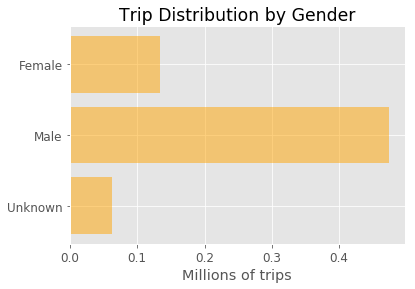

In [63]:
# Plot trip counts by gender
plt.rcParams.update({'font.size': 12})
plt.barh(y_pos, trip_counts / 1000000, align='center', alpha=0.5, color='orange')
plt.yticks(y_pos, genders)
plt.xlabel('Millions of trips')
plt.title('Trip Distribution by Gender')
plt.show()

In [64]:
# Trip Distribution by Duration
# Trips shorter by 1 hour
duration_mins = df.loc[(df.tripduration / 60 < 60)][['tripduration']]
duration_mins = duration_mins / 60 # In minutes

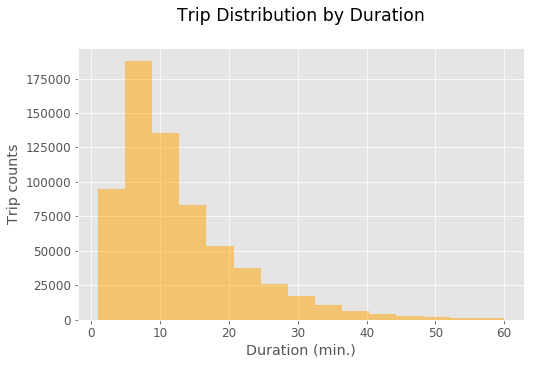

In [66]:
# Plot trip counts by gender
plt.rcParams.update({'font.size': 12})
duration_mins.hist(figsize = (8,5), bins = 15, alpha = 0.5, color = 'orange')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.title('Trip Distribution by Duration\n')
plt.xlabel('Duration (min.)')
plt.ylabel('Trip counts')

In [67]:
# Trip counts per hour on weekdays and weekends
df_sub = df.loc[:, ['tripduration', 'starttime']] # starttime & tripduration
df_sub.index = df_sub['starttime']

weekdays = df_sub[df_sub.index.weekday < 5]
weekends = df_sub[df_sub.index.weekday > 4]

weekdays_countsPerHr = weekdays.groupby(weekdays.index.hour).size()
weekends_countsPerHr = weekends.groupby(weekends.index.hour).size()

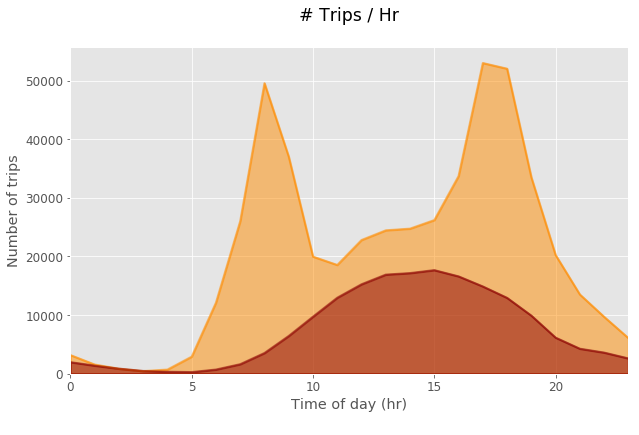

In [70]:
plt.rcParams.update({'font.size': 12, 'legend.fontsize': 10})
weekdays_countsPerHr.plot(kind = 'area', stacked = False, figsize = (10,6), color = 'darkorange', linewidth = 2, label = 'Weekdays')
weekends_countsPerHr.plot(kind = 'area', stacked = False, color = 'darkred', linewidth = 2, label = 'Weekends')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

#ax = plt.gca()

plt.title('# Trips / Hr\n')
plt.xlabel('Time of day (hr)\n')
plt.ylabel('Number of trips')
legend = ax.legend(loc='upper left', frameon = False)

In [72]:
# Let's check how it does # trips happen daily
df.index = df['starttime']
countsPerDay = df.starttime.resample('D').apply('count')

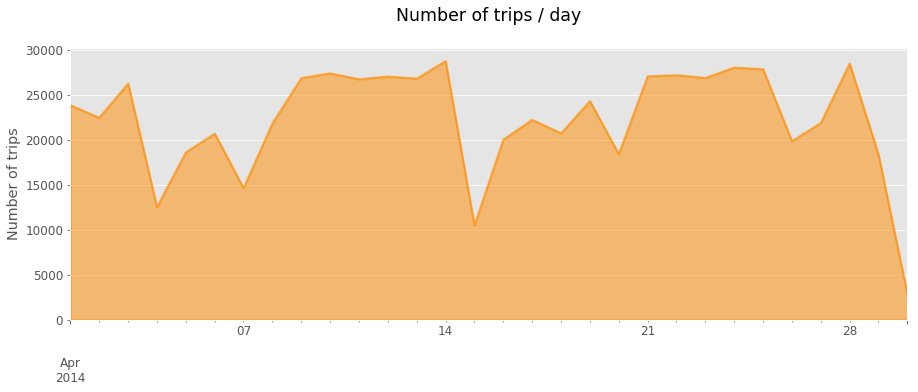

In [75]:
countsPerDay.plot(kind = 'area', stacked = False, figsize = (15, 5), 
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
# ax = plt.gca()
plt.title('Number of trips / day\n')
plt.xlabel('')
plt.ylabel('Number of trips')

In [100]:
# Start Station Details
start_station = df.iloc[:,[3,4,5,6]]
start_station.index = start_station['start station id']
start_station.head()

,start station id,start station name,start station latitude,start station longitude
start station id,,,,
82,82,St James Pl & Pearl St,40.711174,-74.000165
349,349,Rivington St & Ridge St,40.718502,-73.983299
293,293,Lafayette St & E 8 St,40.730287,-73.990765
539,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241
459,459,W 20 St & 11 Ave,40.746745,-74.007756


In [101]:
start_station = start_station.drop_duplicates() #???
start_station.shape

(329, 4)

In [102]:
count_start_station = df.groupby('start station id')['start station id'].count()
mean_start_station = df.groupby('start station id')['tripduration'].mean()
start_station['trip count'] = count_start_station
start_station['mean duration'] = mean_start_station
start_station.head()

,start station id,start station name,start station latitude,start station longitude,trip count,mean duration
start station id,,,,,,
82,82,St James Pl & Pearl St,40.711174,-74.000165,805,908.334161
349,349,Rivington St & Ridge St,40.718502,-73.983299,1254,835.337321
293,293,Lafayette St & E 8 St,40.730287,-73.990765,7056,677.009637
539,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,1345,1283.053532
459,459,W 20 St & 11 Ave,40.746745,-74.007756,3566,911.705272


In [103]:
count_start_station.head()

start station id
72     2380
79     1679
82      805
83      886
116    3748
Name: start station id, dtype: int64

In [104]:
start_station[start_station['mean duration'] > 1400]

,start station id,start station name,start station latitude,start station longitude,trip count,mean duration
start station id,,,,,,
281,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,3788,1502.153643
471,471,Grand St & Havemeyer St,40.712868,-73.956981,604,1440.269868
2002,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,1448,1503.791436
2006,2006,Central Park S & 6 Ave,40.765909,-73.976342,2680,1914.380970
481,481,S 3 St & Bedford Ave,40.712605,-73.962644,744,1504.587366
217,217,Old Fulton St,40.702772,-73.993836,1276,1650.287618
398,398,Atlantic Ave & Furman St,40.691652,-73.999979,854,1416.525761


In [109]:
start_station['mean duration'].min()

10.198262411347518

In [113]:
start_station['mean duration'].max()

31.906349502487561

In [115]:
start_station['trip count'].max()

7996

In [116]:
start_station['trip count'].min()

23

In [129]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

In [132]:
norm = Normalize(start_station['trip count'].min(), start_station)

# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'

start_station_map = folium.Map(location = [40.74, -73.99], 
                               width = 400, 
                               height = 600,
                               tiles = tileset,
                               attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                              zoom_start = 12)

In [174]:
for index, row in start_station.iterrows():
    tc_color = rgb2hex(cm.YlOrRd(row['trip count']))
    folium.CircleMarker([row['start station latitude'],
                        row['start station longitude']],
                    radius=(row['mean duration'] / 10),
                    popup=row['start station name'], 
                    color=tc_color,
                    fill_color=tc_color
                   ).add_to(start_station_map)

In [177]:
start_station_map.save('start_station_map.html')

In [178]:
del start_station_map

In [181]:
from IPython.display import IFrame
IFrame('start_station_map.html', width = 400, height = 600)

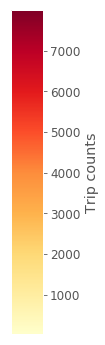

In [183]:
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize = (.5, 30))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to data
cmap = mp1.cm.YlOrRd
norm = mp1.colors.Normalize(start_station['trip count'].min(), start_station['trip count'].max())

cb1 = mp1.colorbar.ColorbarBase(ax1, cmap = cmap, norm = norm, orientation = 'vertical')
cb1.set_label('Trip counts')

# Save as file
from pylab import *
savefig('color_scale_start_station.png', bbox_inches = 'tight')

In [184]:
start_station['trip count'].max()

7996

In [185]:
start_station['trip count'].min()

23

In [186]:
start_station['mean duration'].max() / 60

31.906349502487561

In [187]:
start_station['mean duration'].min() / 60

10.198262411347518